### Harvard GSD  J-Term 2022 
### Introduction to Data Science for Building Simulation and Architectural Design
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 3-7/ 10:00 - 11:30 a.m. <br>
***

Pease copy this colab notebook and rename it before you start! 

---


In [2]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# pandas data frame from csv
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None, index_col = False)
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"

# modify the following file path for your GoogleDrive
FILEPATH = '/content/drive/My Drive/Colab Notebooks/J_Term/data/'

df =GetPandasFromFileCSV(FILEPATH+"HouseZero_full.csv")
df= df[:200] 

In [38]:
df.head()

,Temp,WS,WD
0,4.400000,2.600000,178.000000
1,4.400000,2.283333,182.416667
2,6.311000,2.106667,175.783333
3,7.026988,2.037349,185.168675
4,7.938321,1.109489,235.072993


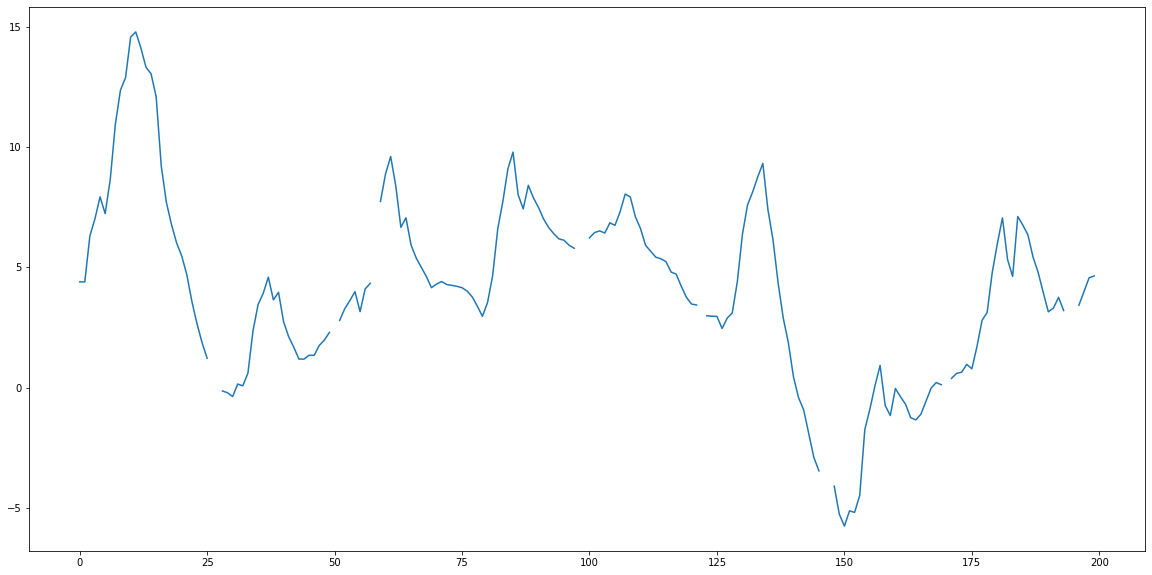

In [5]:
## Visualize Temperature data

plt.figure(figsize=(20,10))
### Your code here



## 2.Imputing missing values

### Mean imputation

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
###Fit the model with data
### Your code here


X = df[["Temp"]]
meanLst = imp_mean.transform(X)

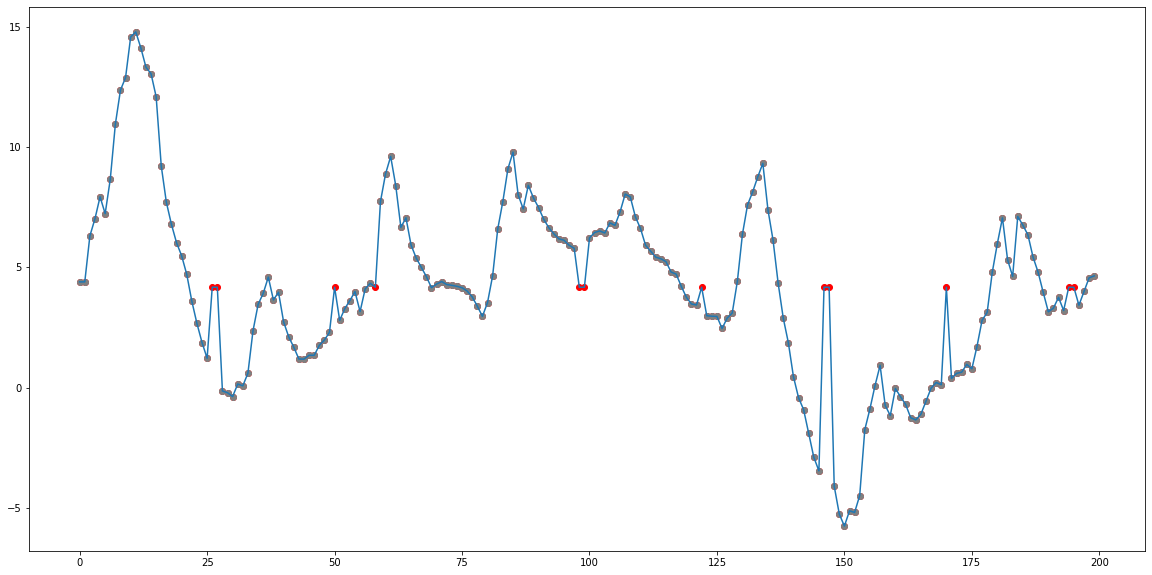

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(df.index, meanLst, color="r")
plt.scatter(df.index, X, color="grey")

plt.plot(meanLst.tolist())

##Median Imputation

In [8]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
###Fit the model with data
### Your code here


medianLst = imp_median.transform(X)

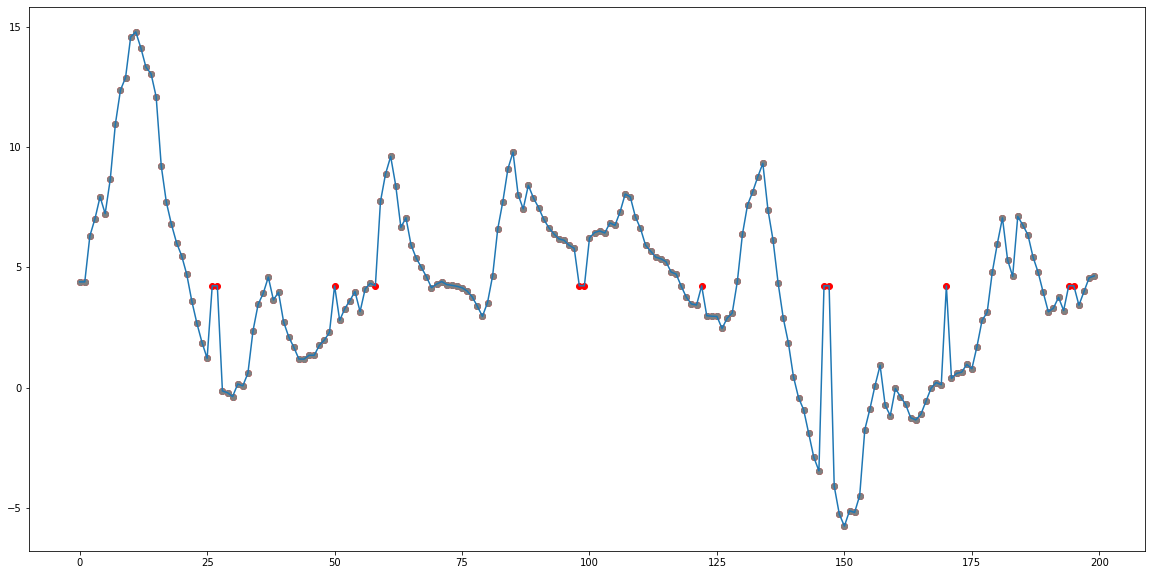

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(df.index, medianLst, color="r")
plt.scatter(df.index, X, color="grey")

plt.plot(medianLst.tolist())

### Zero imputation

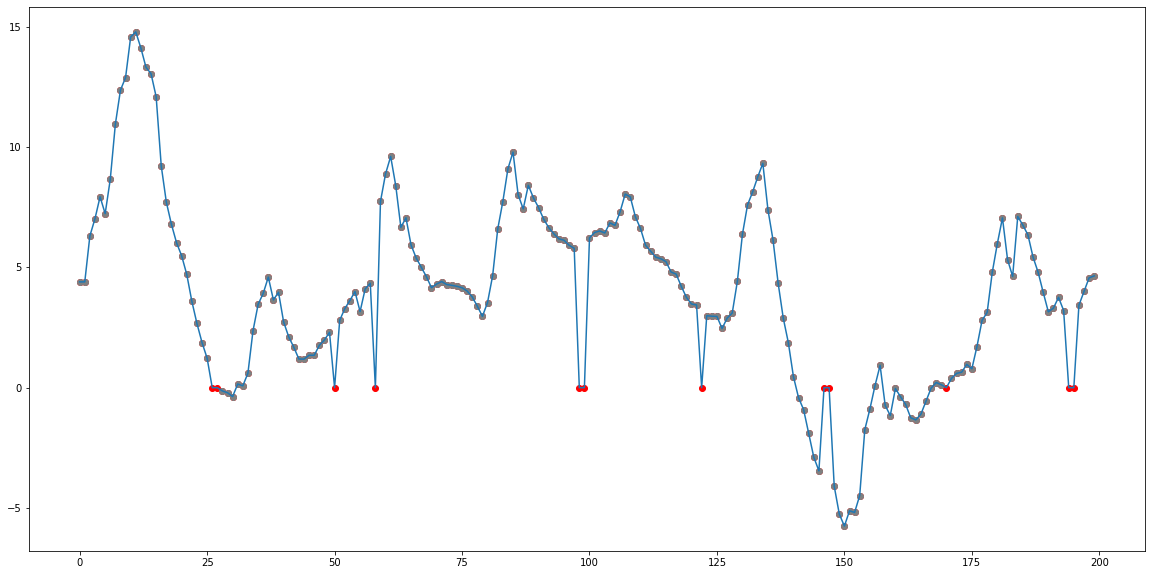

In [35]:
### Replace Null values to 0
### Your code here



plt.figure(figsize=(20,10))
plt.scatter(df.index, df["Temp"], color="r")
plt.scatter(df.index, X, color="grey")

plt.plot(df["Temp"].tolist())

### KNN imputation

In [10]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# prepare data for training KNN
dfnull = df[df["Temp"].isnull()]
dfnull_index = dfnull.index
dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
dfnotnull = df[df["Temp"].notnull()]
dfnotnull_index = dfnotnull.index
dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))

In [11]:
#fit model, predict and evaluate
k = 3

### Your code here



y_pred

array([ 0.98841665,  0.29278535,  2.79696122,  5.39769563,  5.98473431,
        6.16108738,  3.30386669, -3.48348835, -4.27171459,  0.2410028 ,
        3.46588006,  3.54754039])

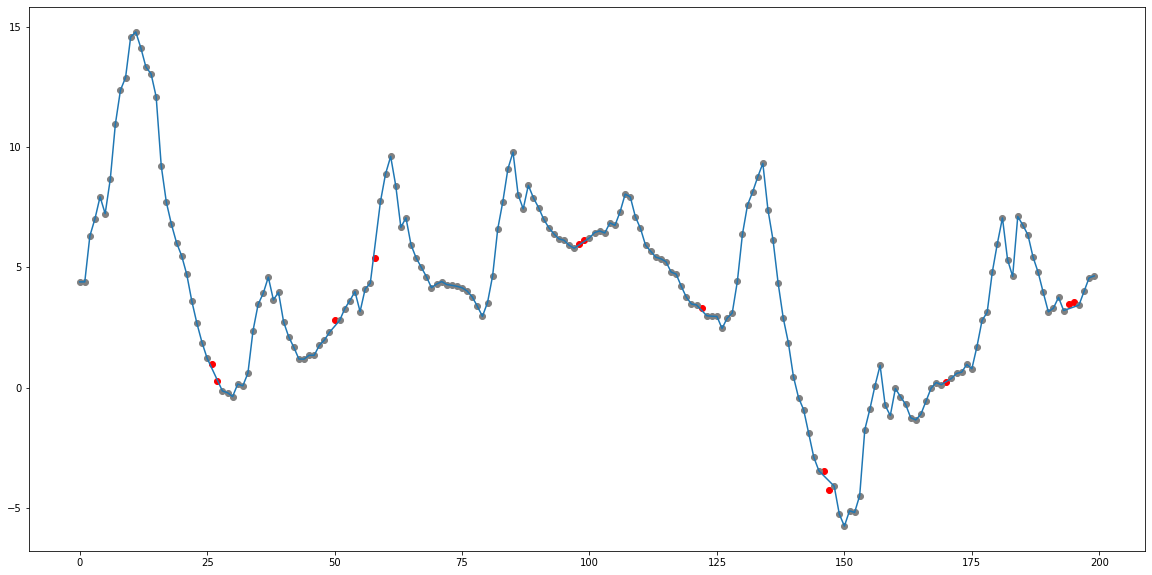

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(dfnull_index, y_pred, color="r")
plt.scatter(dfnotnull_index, dfnotnull["Temp"], color="grey")
plt.plot( dfnotnull["Temp"])

## 3. Data Sampling

In [13]:
!pip install pyDOE

  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=5fe490709620e1385d95282a1feb041d1f12cb8b365865300fb2ae821d0f74d3
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pyDOE


In [14]:
import pyDOE as doe
import numpy as np
import altair as alt
import pandas as pd

In [15]:
## Import data to pandas dataframe
dataRad = pd.read_csv(FILEPATH+'Viz_refer.csv', sep=",", header=None)

dataRad

,0,1,2,3
0,19.5,20.0,0.5,330.7
1,19.5,20.0,1.5,348.8
2,19.5,20.0,2.5,355.2
3,19.5,20.0,3.5,357.8
4,19.5,20.0,4.5,369.3
...,...,...,...,...
3035,1.5,13.5,14.0,83.8
3036,2.5,13.5,14.0,74.9
3037,3.5,13.5,14.0,69.2
3038,4.5,13.5,14.0,64.3


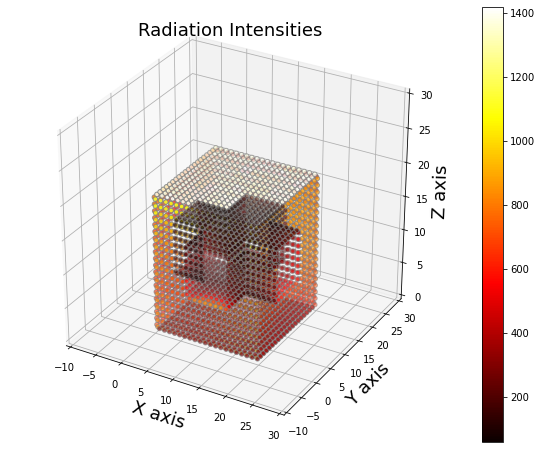

In [16]:
### Visualize data in 3D plot

my_cmap = plt.cm.hot

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(dataRad[0], dataRad[1], dataRad[2], 
                 s=20, c=dataRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()


### Pandas random sampling with number of samples



In [17]:
## Simple random sampling pandas dataframe
### Your code here



SampledRad 

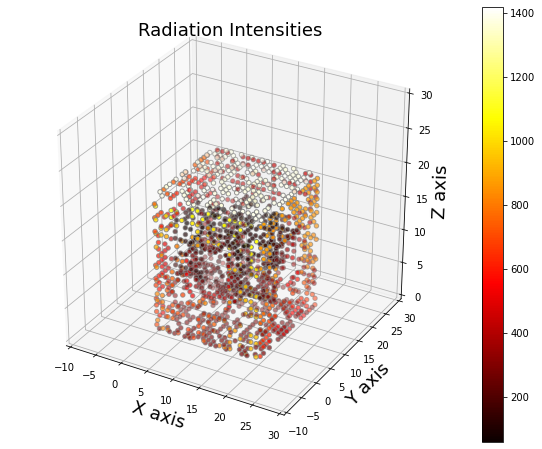

In [18]:
fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(SampledRad[0], SampledRad[1], SampledRad[2], 
                 s=20, c=SampledRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

### Pandas random sampling with fraction

Number of Samples: 1824


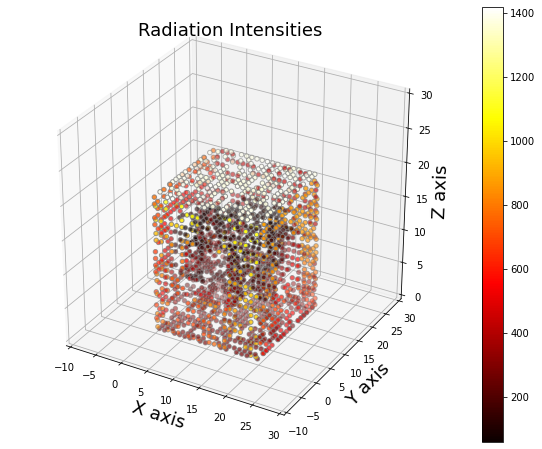

In [21]:
#@title Modify the sampling resolution { run: "auto" }
frac = 0.6 #@param {type:"slider", min:0, max:1, step:0.1}

### Your code here

sample = 

print("Number of Samples:",len(sample))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(sample[0], sample[1], sample[2], 
                 s=20, c=sample[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

### Pandas sampling Weighted Samples

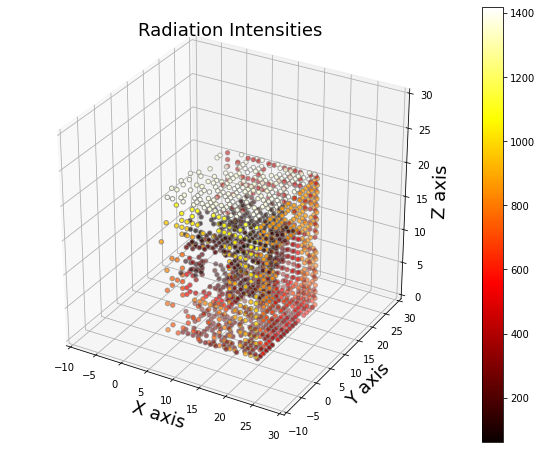

In [25]:
#@title Modify the sampling resolution { run: "auto" }
index = 0 #@param {type:"slider", min:0, max:3, step:1}

# Weighted sample 
### Your code here

sample = 

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(sample[0], sample[1], sample[2], 
                 s=20, c=sample[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

### Pandas Sampling Every nth Item

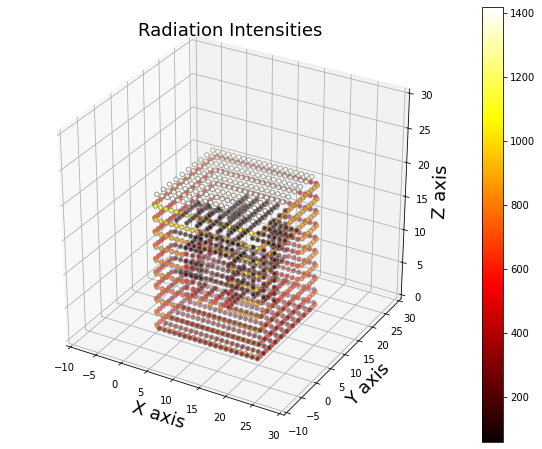

In [26]:
### Your code here

sample = 

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(sample[0], sample[1], sample[2], 
                 s=20, c=sample[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

In [ ]:
SampledRad.to_csv('sampledRad.csv',index=False)